In [ ]:
'''
This notebook will be analyzing Facebook messages for Eric Lin.
Data retrieved from July 2014 to January 23rd 2020.
Code inspired by HCS Bootcamp 1 presented in 2018 by Jeffrey He.
'''

In [97]:
import os
import json
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

CURRENT_DIRECTORY = os.getcwd()
NUMBER_TO_ANALYZE = 5000
MESSAGE_THRESHOLD = 500

In [185]:
def get_json_data(chat, message_file):
    try:
        json_location = CURRENT_DIRECTORY + "/inbox/" + chat + "/" + message_file   # accounts for numerous message files
        with open(json_location) as json_file:
            json_data = json.load(json_file)
            return json_data
    except IOError:
        pass # some things the directory aren't messages (DS_Store, stickers_used, etc.)


In [178]:
chats = os.listdir(CURRENT_DIRECTORY + "/inbox")[:NUMBER_TO_ANALYZE]
sorted_chats = []
final_data_messages = {}
final_data_times = {}
final_data_words = {}
invalid_message_count = 0

In [187]:
sorted_chats = []
print('Analyzing ' + str(min(NUMBER_TO_ANALYZE, len(chats))) + ' chats...')

for chat in chats:
    if chat == '.DS_Store':   # not a real chat
        continue
    messages = []
    # Account for multiple chat files (each json contains up to 10k messages)
    message_files = os.listdir(CURRENT_DIRECTORY + "/inbox/" + chat)
    for message_file in message_files:
        if 'message' in message_file: 
            json_data = get_json_data(chat, message_file)
            if json_data != None:
                if len(messages) == 0:
                    messages = json_data["messages"]
                else:
                    messages.extend(json_data["messages"])
                title = json_data["title"]
                thread_type = json_data["thread_type"]
                
    if len(messages) >= MESSAGE_THRESHOLD:
        sorted_chats.append((len(messages), chat, messages, title, thread_type))

sorted_chats.sort(reverse=True)

print('Finished processing chats...')

len(sorted_chats)


Analyzing 1085 chats...
Finished processing chats...


136

In [226]:
print("_________Eric's Chats (ranked by # of messages)________")
for i, (messagesn, chat, messages, title, thread_type) in enumerate(sorted_chats):
    number_messages = {}
    person_to_times = {}
    number_words = {}
    
    if thread_type != "Regular":   # if you want to include group chats or not
        pass

    print(str(i+1) + " - " + f'{len(messages):,}' + " messages - " + title)
    
    for message in messages:
        try:
            name = message["sender_name"]
            time = message["timestamp_ms"]
            message_content = message["content"]

            number_messages[name] = number_messages.get(name, 0)
            number_messages[name] += 1

            person_to_times[name] = person_to_times.get(name, [])
            person_to_times[name].append(datetime.datetime.fromtimestamp(time/1000.0))

            number_words[name] = number_words.get(name, [])
            number_words[name].append(len(message_content.split()))
        except KeyError:
            # happens for special cases like users who deactivated, unfriended, blocked
            invalid_message_count += 1

    final_data_messages[i] = number_messages
    final_data_times[i] = person_to_times
    final_data_words[i] = number_words

print('Found ' + str(invalid_message_count) + ' invalid messages...')
print('Found ' + str(len(sorted_chats)) + ' chats with ' + str(MESSAGE_THRESHOLD) + ' messages or more')

_________Eric's Chats (ranked by # of messages)________
1 - 768,003 messages - Angela Wu
2 - 63,674 messages - Catherine Yeo
3 - 51,209 messages - Shhhh Keep it a secret
4 - 32,838 messages - Matthew Ho
5 - 20,159 messages - mahjong club
6 - 19,685 messages - asian pal nons-
7 - 15,396 messages - Glover/Porcelli(aka "When in the course of human events...")
8 - 15,290 messages - Î¼ÎµÏ Ã¤dmÃ®ts 2022
9 - 15,008 messages - The Inactive Group
10 - 11,623 messages - jp morgan 2.0
11 - 10,974 messages - Fantastic Beasts?
12 - 9,993 messages - Katherine Cheng
13 - 9,819 messages - Asian Pals With Autotranslate
14 - 8,767 messages - an abundance of catherines
15 - 8,661 messages - Sara Du
16 - 8,455 messages - Anna Wang
17 - 8,003 messages - jp morgan
18 - 6,611 messages - app sice
19 - 5,661 messages - Junu Lee
20 - 5,376 messages - Evan Hu
21 - 5,046 messages - Phillip Phan
22 - 4,883 messages - we should have a name
23 - 4,682 messages - IBET
24 - 4,566 messages - 2k18 IIYM Squad
25 - 3,987

In [220]:
def plot_num_messages(chat_number):
    plotted_data = final_data_messages[chat_number]
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'g', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Number of Messages Sent')
    pl.tight_layout()
    pl.show()
    
def plot_histogram_time(chat_number):
    person_to_times = final_data_times[chat_number]
    pl.xlabel('Time')
    pl.ylabel('Number of Messages')
    pl.title('# of Messages Over Time')
    colors = ['b', 'r', 'c', 'm', 'y', 'k', 'w', 'g']
    for i , person in enumerate(person_to_times):
        plotted_data = person_to_times[person]
        pl.hist(plotted_data, 100, alpha=0.3, label=person, facecolor=colors[i % len(colors)], cumulative=False)
    #pl.legend()
    pl.xticks(rotation=90)
    pl.tight_layout()
    pl.show()
    
def plot_histogram_time_plt(chat_number):
    person_to_times = final_data_times[chat_number]
    colors = ['b', 'r', 'c', 'm', 'y', 'k', 'w', 'g']
    
    for i, person in enumerate(person_to_times):
        plotted_data = person_to_times[person]
        # convert the datetime format to matplotlib date format 
        mpl_data = mdates.date2num(plotted_data)

        # plot it
        fig, ax = plt.subplots(1,1)
        ax.hist(mpl_data, bins=20, color=colors[i % len(colors)])
        locator = mdates.AutoDateLocator(minticks = 5, maxticks = 8)
        ax.xaxis.set_major_locator(locator)
        ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
    plt.show()

def plot_histogram_words(chat_number):
    temp = {}
    for person in final_data_words[chat_number]:
        temp[person] = np.average(final_data_words[chat_number][person])
    plotted_data = temp
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'm', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Average Word Count per Message')
    pl.tight_layout()
    pl.show()
    
def plot(chat_number):
    plot_num_messages(chat_number)
    plot_histogram_time(chat_number)
    plot_histogram_words(chat_number)

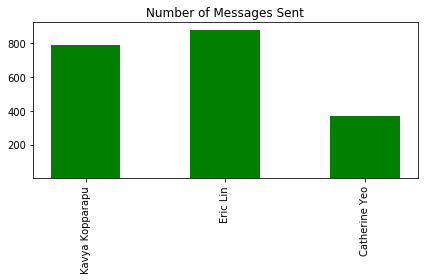

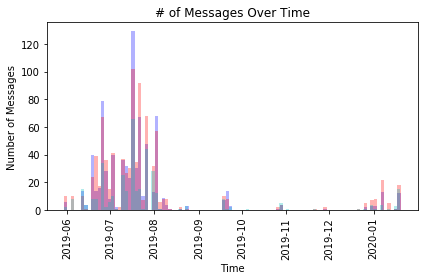

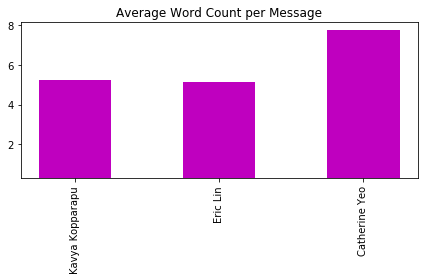

In [229]:
plot(38)

In [152]:
final_data_times[0]['Eric Lin'][89000]

datetime.datetime(2019, 9, 20, 23, 5, 3, 456000)

In [156]:
print(datetime.datetime.fromtimestamp(1505675443053/1000.0))

2017-09-17 15:10:43.053000


In [160]:
messages

[{'sender_name': 'Isaac Robinson',
  'timestamp_ms': 1563805599418,
  'content': 'And I went last weekend dude it was so fun',
  'type': 'Generic'},
 {'sender_name': 'Isaac Robinson',
  'timestamp_ms': 1563805595983,
  'content': 'Omg I love her!',
  'type': 'Generic'},
 {'sender_name': 'Julian Lee',
  'timestamp_ms': 1563805508221,
  'content': 'from exeter',
  'type': 'Generic'},
 {'sender_name': 'Julian Lee',
  'timestamp_ms': 1563805503890,
  'content': 'Lee',
  'type': 'Generic'},
 {'sender_name': 'Isaac Robinson',
  'timestamp_ms': 1563805496674,
  'content': 'Maria?',
  'type': 'Generic'},
 {'sender_name': 'Julian Lee',
  'timestamp_ms': 1563805335655,
  'content': 'garveyj@bu.edu',
  'type': 'Generic'},
 {'sender_name': 'Julian Lee',
  'timestamp_ms': 1563805268953,
  'content': 'yesterday',
  'type': 'Generic'},
 {'sender_name': 'Julian Lee',
  'timestamp_ms': 1563805264939,
  'content': 'I met Maria btw',
  'type': 'Generic'},
 {'sender_name': 'Julian Lee',
  'timestamp_ms': 